# Capstone: Analisando a temperatura do Brasil

Nessa prática iremos juntar os conhecimentos que vimos durante toda a matéria. Vamos analisar os dados de temperatura do Brasil que vimos nas aulas de Python. Vamos utilizar uma [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) para estimar a taxa de variação da temperatura ao longo dos anos. Finalmente, vamos visualizar esses valores em um mapa do Brasil.

Faremos funções para cada etapa para podermos testar as partes do nosso código separadamente.

## Setup

Abaixo, vamos carregar todas as bibliotecas que precisamos:

* `numpy` para fazer contas com matrizes e vetores
* `maptlotlib.pyplot` para fazer gráficos
* `mpl_toolkits.basemap` para fazer mapas
* `scipy.stats` para a regressão linear
* `glob` para descobrir os nomes de todos os arquivos em uma pasta

In [127]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap 
from scipy.stats import linregress
from glob import glob

<div class="alert text-center" style="font-size: 16pt">
Diferente das outras práticas, eu vou preecher o código inicial ao vivo durante a aula. 
<br><br>
Façam junto comigo para não se perderem.
</div>

Primeira parte da tarefa: criamos funções para um unico arquivo padronizado.

In [128]:
def le_lat_lon(nome_arquivo):
    '''Esta função executa a leitura e extração das coordenadas 
    discrminadas no texto do arquivo'''
    arquivo = open(nome_arquivo) #abrimos o arquivo e o salvamos em uma variavel.
    for linhas in range(0, 5): #usamos for para reptir o proximo passso até a linha desejada
        linha = arquivo.readline() 
        #executamos a leitura uma a uma das linhas 
        #considerando que o for salva a leitura feita em uma variavel a cada rodada.
        #e que nesse caso não criamos uma lista, será salvo na variavel somente a linha que queremos  
    partes = linha.split()
    #partimos a linha em varias partes usando espaço como criterio de separação e salvamosem uma "variavel"
    lat = float(partes[1]) 
    #pegamos a parte que representa a latitude e a salvamos em uma variavel como numero(por isso a função float)
    if partes[2] == 'S,': 
    #para indicar graficamente a coordenada (sul = negativo, norte = positivo) usamos a função if 
    #alterando o sinal pra negativo caso apresente 's,'
        lat = -lat
    lon = float(partes[3]) #idem ao da latitude porem para longitude
    if partes[4] == 'W': #idem ao norte/sul porem pra leste/oeste.
        lon = -lon
    return lat, lon

In [129]:
lat, lon = le_lat_lon('dados/0.80S-49.02W-TAVG-Trend.txt') #testamos a função le_lat_lon
print(lat, lon)

-0.8 -49.02


In [130]:
def le_temperatura_abs(nome_arquivo):
    '''Esta função executa a leitura e extração da temperatura absoluta
    discrminadas no texto do arquivo'''
    arquivo = open(nome_arquivo) 
    for linhas in range(48): 
    #considerando que o arquivo é padronizado, for foi utilizado para rodar o proximo passo até a linha desejada
        linha = arquivo.readline() #executamos a leitura uma a uma das linhas e salvammos em uma variavel
    partes = linha.split() #partimos a linha em partes
    temp_abs = float(partes[-3]) 
    #pegamos a parte que representa a temperatura abs. e salvamos em uma variavel como numero
    return temp_abs

In [131]:
temperatura = le_temperatura_abs('dados/0.80S-49.02W-TAVG-Trend.txt') #testamos a função le_temperatura_abs
print(temperatura)

26.74


In [132]:
def le_anos_anomalias(nome_arquivo):
    '''Esta função executa a leitura e extração das anomalias de temperatura e dos anos
    discrminadas na tabela do arquivo e calcula os anos decimais'''
    dados = np.loadtxt(nome_arquivo, comments='%') 
    #extraimos e salvamos a tabela do arquivo desconsiderando a parte escrita 
    anos = dados[:, 0] #salvamos a coluna dos anos em uma lista
    meses = dados[:, 1] #salvamos os meses  em uma lista
    anos_decimais = (meses - 1)/12 + anos #calculamos os anos decimais
    anomalia = dados[:, 4]#salvamos a coluna das anomalias anuais em uma lista
    return anos_decimais, anomalia

In [133]:
anos, anom = le_anos_anomalias('dados/0.80S-49.02W-TAVG-Trend.txt') #aplicamos a função em um arquivo

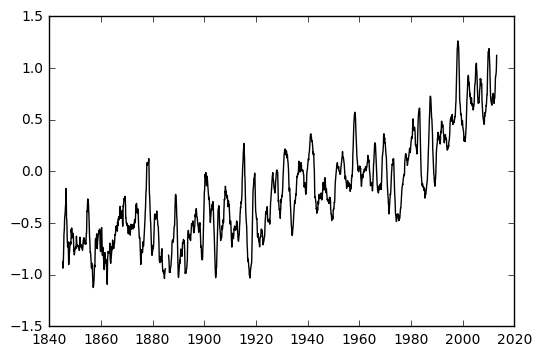

In [134]:
plt.figure() #para melhor analise testamos a função plotando uma imagem do resultado
plt.plot(anos, anom, '-k')

In [135]:
def cal_temperatura_real(nome_arquivo):
    '''Esta função executa o calculo das temperaturas por anos a partir da
    temperatura absoluta, das anomalias e dos anos extraidos do arquivo.
    Obs.: as funções le_anos_anomalias e le_temperatura_abs devem estar definidas'''
    anos, anom = le_anos_anomalias(nome_arquivo)
    #executou a leitura das anomalias e dos anos e salvou cada um numa lista
    temp_abs = le_temperatura_abs(nome_arquivo) #executou a leitura da tempperatura absoluta e salvou numa variavel
    temperaturas = temp_abs + anom #calculou a ttemperatura real com base em cada anomalia
    return temperaturas, anos

In [136]:
temperaturas, anos = cal_temperatura_real('dados/13.66S-38.81W-TAVG-Trend.txt') #aplicamos a função em um arquivo


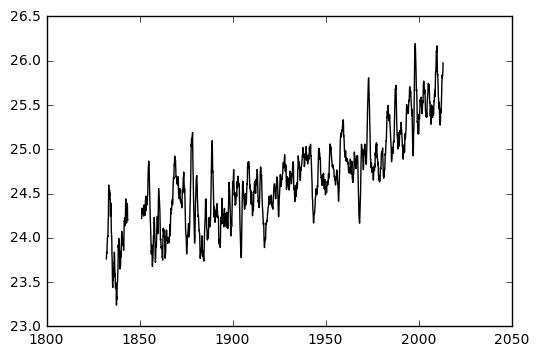

In [137]:
plt.figure()
plt.plot(anos, temperaturas, '-k') #testamos a função por meio de um grafico (facilitar a visualização de erro)

In [139]:
 #forma que a turma concluiu para tirá os nan

anos_sem_nan = [] #criamos uma lista para receber os anos que não correspondiam a nan
temperaturas_sem_nan = [] #criamos uma lista para receber as temperaturas que não eram nan
for i in range(len(temperaturas)): 
    #usamos for, range e len juntos para pecorrer todos os indices dos elementos da lista temperaturas
    if not np.isnan(temperaturas[i]): #usamos if para excluir os indices correspondentes a nan
        temperaturas_sem_nan.append(temperaturas[i])
        #anexamos a lista que criamos somente as temperaturas que não eram nan
        anos_sem_nan.append(anos[i])
#usando o mesmo indice das temperaturas salvamos na lista que criamos somente 
#os anos que correspondem a temperaturas que não eram nan

print(anos_sem_nan)   #testamos o que foi feito     

[1832.1666666666667, 1832.25, 1832.3333333333333, 1832.4166666666667, 1832.5, 1832.5833333333333, 1832.6666666666667, 1832.75, 1832.8333333333333, 1832.9166666666667, 1833.0, 1833.0833333333333, 1833.1666666666667, 1833.25, 1833.3333333333333, 1833.4166666666667, 1833.5, 1833.5833333333333, 1833.6666666666667, 1833.75, 1833.8333333333333, 1833.9166666666667, 1834.0, 1834.0833333333333, 1834.1666666666667, 1834.25, 1834.3333333333333, 1834.4166666666667, 1834.5, 1834.5833333333333, 1834.6666666666667, 1834.75, 1834.8333333333333, 1834.9166666666667, 1835.0, 1835.0833333333333, 1835.1666666666667, 1835.25, 1835.3333333333333, 1835.4166666666667, 1835.5, 1835.5833333333333, 1835.6666666666667, 1835.75, 1835.8333333333333, 1835.9166666666667, 1836.0, 1836.0833333333333, 1836.1666666666667, 1836.25, 1836.3333333333333, 1836.4166666666667, 1836.5, 1836.5833333333333, 1836.6666666666667, 1836.75, 1836.8333333333333, 1836.9166666666667, 1837.0, 1837.0833333333333, 1837.1666666666667, 1837.25, 

In [140]:
#metodo que o pprofessor mostrou para tirar os nan

not_nan = ~np.isnan(temperaturas) #identificamos na lista temperaturas tudo que não era nan
temperaturas_sem_nan = temperaturas[not_nan] 
#salvamos numa nova lista todos os elementos de temperaturas que correspodiam a posição dos not_nan
anos_sem_nan = anos[not_nan]
#salvamos numa nova lista todos os elementos de anos que correspodiam a posição dos not_nan

In [141]:
a, b, r_value, p_value, std_err = linregress(anos_sem_nan, temperaturas_sem_nan) 
#aplicamos a regressão nas nossas listas sem nan e anos que correspondessem a nan

In [142]:
print(a, '°C/ano') #testamos para ver se a correspondia a nossa taxa de variação de temperatura por anos

0.00842379196862 °C/ano


Segunda parte da tarefa: aplicamos tudo, porem de forma a rodar sobre todos os arquivos

In [143]:
arquivos = glob('dados/*txt') #criamos uma lista com o nome dos arquivos
latitudes = [] #criamos uma lista para receber todas as latitudes
longitudes = [] #criamos uma lista para receber todas as longitudes
taxa_de_var_temperatura = [] #criamos uma lista para receber todas as taxas de variação de temperatura
for arquivo in arquivos: #usamos for para pecorrer todos os arquivos 
    #aplicamos as funções definidas previamente salvando os resulados em variaveis e listas
    latitude, longitude = le_lat_lon(arquivo) 
    temperaturas,anos = cal_temperatura_real(arquivo)
    not_nan = ~np.isnan(temperaturas)
    temperaturas_sem_nan = temperaturas[not_nan]
    anos_sem_nan = anos[not_nan]
    a, b, r_value, p_value, std_err = linregress(anos_sem_nan, temperaturas_sem_nan)
    #salvamos as latitudes, longitudes e taxas de variação, uma a uma, nas listas criadas anteriormente
    latitudes.append(latitude)
    longitudes.append(longitude)
    taxa_de_var_temperatura.append(a)
print(longitudes, latitudes, taxa_de_var_temperatura) #avaliamos se o resultado obtido era o eperado
    

[-49.02, -48.27, -38.81, -47.5, -60.27, -44.36, -54.6, -42.82, -46.31, -49.66, -51.69, -40.98] [-0.8, -10.45, -13.66, -15.27, -2.41, -20.09, -20.09, -23.31, -23.31, -24.92, -29.74, -4.02] [0.0083216097444633336, 0.0082432495582120697, 0.0084237919686162271, 0.0082342027384549963, 0.0074044261106612792, 0.0082902404081173671, 0.0079203997100460617, 0.0082918471994158881, 0.0082296678585819603, 0.0081050907237375375, 0.0082223084245346169, 0.0088148853553276559]


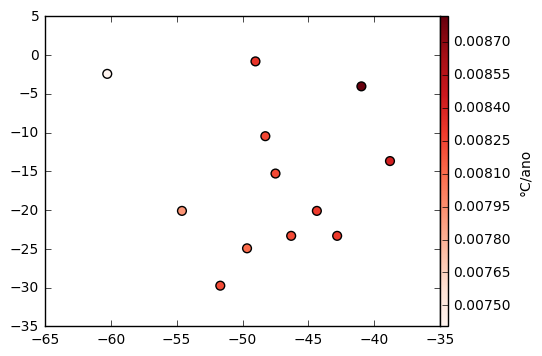

In [144]:
#plotamos a resposta num grafico
#obeservamos que neste caso não é o ideal pois não respeita as deformações da projeção da superficie da Terra no plano
plt.figure()
plt.scatter(longitudes, latitudes, s=40, c=taxa_de_var_temperatura, cmap='Reds')
cb = plt.colorbar(pad =0 , aspect=40)
cb.set_label('°C/ano')

Usamos então o Basemap, para criar um mapa e plotar nosso resultado
Basemap : http:matplotlib.org/basemap

In [145]:
bm = Basemap(projection='merc', llcrnrlat=-35, llcrnrlon=-65, urcrnrlat=5, urcrnrlon=-35)
#definimos o tipo de mapa e a região do globo que queremos representar

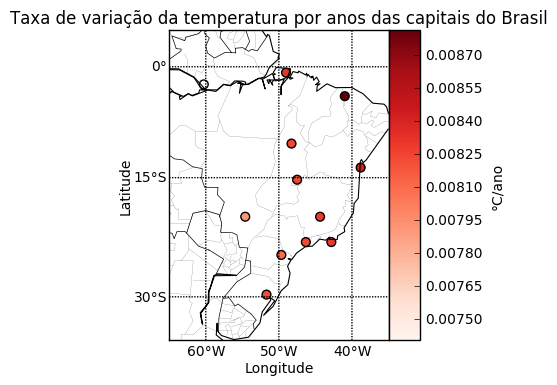

In [150]:
plt.figure()
bm.scatter(longitudes, latitudes, s=40,c=taxa_de_var_temperatura, cmap='Reds',latlon=True)
#adicionamos as taxas de variação e suas respectivas coordenadas, 
#alem de definir a variação de cor com base na taxa de variação de temperatura
cb = plt.colorbar(pad=0, aspect=10) 
#adicionamos a barra mostrando a variação de cor conforme a taxa de variação de temperatura
cb.set_label('°C/ano')#acrecentamos o rotulo da barra
bm.drawcoastlines(linewidth=0.8) # acresentamos as linhas de costa e definimos seu tamanho
bm.drawcountries(linewidth=0.5) #acresentamos as divisas dos países e definimos seu tamanho
bm.drawstates(linewidth=0.1) # acresentamos as divisas dos estados e definimos seu tamanho
bm.drawmeridians([-60,-50,-40], labels=[0,0,0,1])
#acresentamos os meridianos e definimos onde ficaria sua identificação
bm.drawparallels([0,-15,-30], labels=[1,0,0,0]) 
#acresentamos os paralelos e definimos onde ficaria sua identificação
plt.title('Taxa de variação da temperatura anual das capitais do Brasil') #adicionamos um titulo
plt.xlabel('Longitude',  labelpad = 15) #adicionamos o rotulo do eixo x e a distancia que ele ficaria do mesmo
plt.ylabel ('Latitude', labelpad=26)   #adicionamos o rotulo do eixo y e a distancia que ele ficaria do mesmo

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)